In [1]:
import torch
import math

In [2]:
def normal(x, loc, scale):
    return 1 / (scale * math.sqrt(2 * math.pi)) * torch.exp(- 1 / 2 * ((x - loc) / scale) ** 2)


class GaussianReceptiveFields:
    def __init__(self, low: float, high: float, n: int, scale: float = 1, clamp: bool = False):
        self.low = low
        self.high = high
        self.n = n
        self.scale = scale
        self.clamp = clamp

        self.locs = torch.linspace(low, high, n)

    def __call__(self, x: torch.Tensor):
        if self.clamp:
            x = torch.clamp(x, self.low, self.high)
        return torch.clamp(normal(self.locs.view(self.locs.size(0), *[1 for _ in x.shape]) - x, 0, self.scale), min=1e-5, max=1)


In [6]:
g = GaussianReceptiveFields(-10, 10, 80, 0.3)

In [7]:
from matplotlib import pyplot as plt

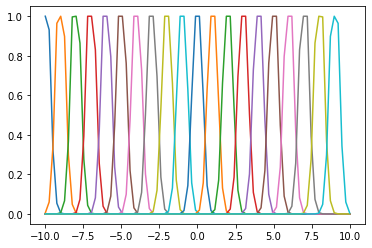

In [8]:
for i in range(-10, 10):
    plt.plot(g.locs, g(torch.tensor([i])))

In [9]:
from bindsnet.encoding.encodings import poisson

In [10]:
encoded_gaussian_receptive_field = poisson(time=100, datum=g(torch.tensor([-2, 2, 5])) * 100)

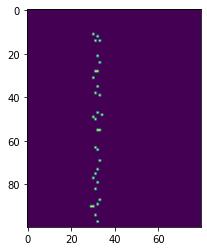

In [11]:
plt.imshow(encoded_gaussian_receptive_field[:, :, 0])

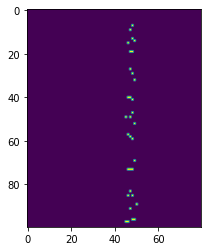

In [12]:
plt.imshow(encoded_gaussian_receptive_field[:, :, 1])

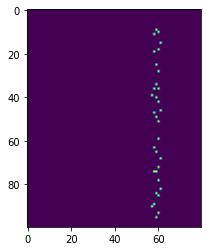

In [13]:
plt.imshow(encoded_gaussian_receptive_field[:, :, 2])

In [41]:
inpt = torch.normal(0, 1, [2, 3]) * 5

In [47]:
inpt[0, 1]

tensor(9.8643)

In [43]:
encoded_gaussian_receptive_field = poisson(time=100, datum=g(inpt) * 100)

In [44]:
encoded_gaussian_receptive_field.shape

torch.Size([100, 80, 2, 3])

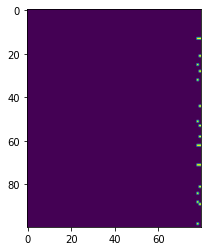

In [48]:
plt.imshow(encoded_gaussian_receptive_field[:, :, 0, 1])

In [212]:
b = torch.rand(4, 3, 2)

In [213]:
(a.view(a.size(0), *[1 for _ in b.shape]) - b).shape

torch.Size([10, 4, 3, 2])